In [34]:
import pandas as pd  
import numpy as np  
import matplotlib.pyplot as plt  
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
from sklearn import metrics
import os

In [6]:
data = pd.read_csv (r'C:\Users\joemo\OneDrive\Desktop\PY4E\Data Science\salary.csv')  
data.head()

,YearsExperience,Salary
0,1.1,39343
1,1.3,46205
2,1.5,37731
3,2.0,43525
4,2.2,39891


In [7]:
#Summary statistics 
data.describe()

,YearsExperience,Salary
count,35.000000,35.000000
mean,6.308571,83945.600000
std,3.618610,32162.673003
min,1.100000,37731.000000
25%,3.450000,57019.000000
50%,5.300000,81363.000000
75%,9.250000,113223.500000
max,13.500000,139465.000000


In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35 entries, 0 to 34
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   YearsExperience  35 non-null     float64
 1   Salary           35 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 688.0 bytes


In [23]:
X = data.iloc[:, :-1].values
y = data.iloc[:, -1].values

In [24]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [26]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression() 
regressor.fit(X_train,y_train)
regressor.intercept_, regressor.coef_

(29445.056520181286, array([8629.79240044]))

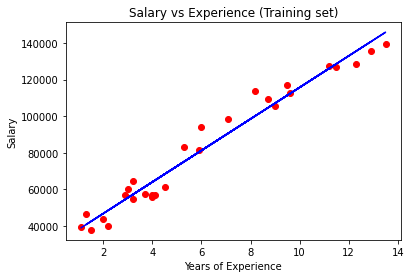

In [27]:
plt.scatter(X_train, y_train, color = 'red')
plt.plot(X_train, regressor.predict(X_train), color = 'blue')
plt.title('Salary vs Experience (Training set)')
plt.xlabel('Years of Experience')
plt.ylabel('Salary')
plt.show()

In [30]:
y_pred = regressor.predict(X_test)

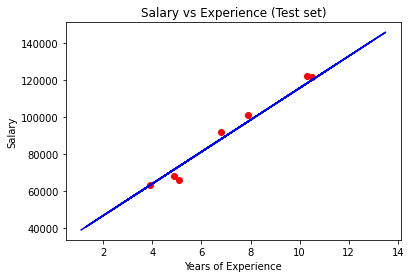

In [42]:
plt.scatter(X_test, y_test, color = 'red')
plt.plot(X_train, regressor.predict(X_train), color = 'blue')
plt.title('Salary vs Experience (Test set)')
plt.xlabel('Years of Experience')
plt.ylabel('Salary')
plt.show()

In [31]:
df = pd.DataFrame({'Actual': y_test.flatten(), 'Predicted': y_pred.flatten()})
df

,Actual,Predicted
0,121872,120057.876725
1,91738,88127.644843
2,66029,73456.997762
3,122391,118331.918245
4,101302,97620.416484
5,67938,71731.039282
6,63218,63101.246882


In [35]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 3500.419123800644
Mean Squared Error: 16561691.220974546
Root Mean Squared Error: 4069.605782010654


In [41]:
rss = ((y_test-y_pred)**2).sum()
print(f"Residual Sum of Squares: {rss}")

Residual Sum of Squares: 115931838.54682182


In [51]:
from sklearn.metrics import mean_squared_error, r2_score
rms = np.sqrt(mean_squared_error(y_test, y_pred))
print(f"Root Mean Square: {rms}")

Root Mean Square: 4069.605782010654


In [49]:
r2 = r2_score(y_test, y_pred)
N = y_test.shape[0]
p=1
x = (1-r2)
y = (N-1) / (N-p-1)
adj_rsquared = (1 - (x * y))
print(f"Adjusted-R2 : {adj_rsquared} ")
print(f"R2: {r2}")

Adjusted-R2 : 0.9649708294532098 
R2: 0.9708090245443415
